In [1]:
"""
Name: con_parameter_scan.ipynb
Authors: Stephan Meighen-Berger
Example for a parameter scan
"""

In [2]:
# General imports
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.signal import savgol_filter
from tqdm import tqdm

In [3]:
# Latex text rendering
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [4]:
# Adding path to module
sys.path.append("../core/")

In [5]:
# Module imports
from contagion import CONTAGION
from con_config import config

In [6]:
# Creating a fourth_day object
infected=10
mean_interactions_arr = [0., 0.4, 0.6, 1.]
results = []
results_R = []
for mean_interactions in mean_interactions_arr:
    config['mean social circle interactions'] = mean_interactions
    contagion = CONTAGION(infected, config=config)
    # Storing the solutions
    contagion.sim()
    results.append(contagion.mc_run.new_infections)
    results_R.append(contagion.R)

In [7]:
# Plotting standards
std_size = 10.
fontsize = 20.
lw=3.
h_length=1.

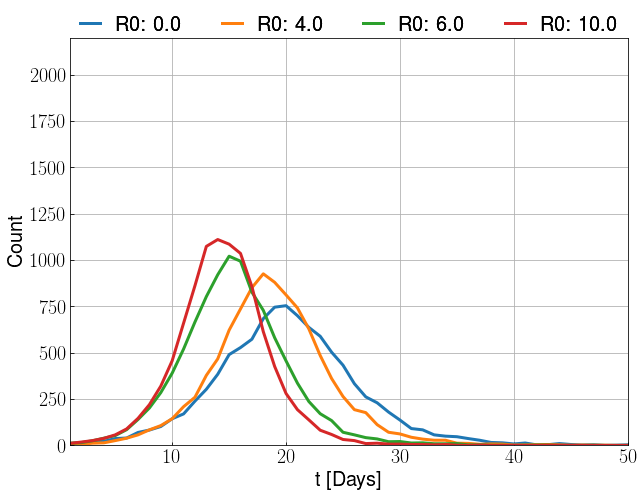

In [11]:
# Infections per time step
figure, ax = plt.subplots(figsize=(std_size, std_size * 6. / 8.))
colors = ['#fdcc8a',
          '#fc8d59',
          '#d7301f']
for i, mean_interactions in enumerate(mean_interactions_arr):
    ax.plot(contagion.t, results[i],
            lw=lw, label='R0: %.1f' %results_R[i])
ax.set_xlim(1e0, 50)
ax.set_ylim(0., 2200)
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_xlabel(r't [Days]', fontsize=fontsize)
ax.set_ylabel(r'Count', fontsize=fontsize)
ax.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax.get_legend_handles_labels()
lgd1 = ax.legend(h,l, loc=9, bbox_to_anchor=(0.5, +1.1),
                 ncol=4, fontsize=fontsize, handlelength=h_length,
                 fancybox=True, frameon=False)
ax.add_artist(lgd1)
plt.grid(True)
plt.show()

In [12]:
figure.savefig("C:\\Users\\steph\\OneDrive\\University TUM\\PhD\\Plots\\Corona\\Contagion_Contact_Rate_Scan.png",
               bbox_inches='tight')